# Computer Lab 2: Copernican Revolution

## Introduction
To start off this assignment, we begin by importing the modules we need. As always, we will need `numpy` and `matplotlib.pyplot`; we will also need `pandas`'s input and output capabilities to read our data, so let's import it, too. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('astron_obs.csv')
df

,times,angle_sun,angle_mercury,angle_venus,angle_mars,angle_jupiter,angle_saturn,angle_uranus,dist_sun,dist_mercury,dist_venus,dist_mars,dist_jupiter,dist_saturn,dist_uranus
0,0,3.141593,3.141593,3.141593,0.000000,0.000000,0.000000,0.000000,1.514898e+11,8.156325e+10,4.275863e+10,9.780769e+10,6.641576e+11,1.355945e+12,2.853888e+12
1,864000,-2.975192,3.064365,3.040696,-0.061618,-0.021517,-0.012646,-0.006821,1.514476e+11,8.962979e+10,4.497884e+10,9.934092e+10,6.663722e+11,1.358166e+12,2.856083e+12
2,1728000,-2.808606,3.102151,2.993685,-0.112457,-0.041574,-0.024654,-0.013363,1.513220e+11,1.114080e+11,5.102819e+10,1.037892e+11,6.729236e+11,1.364752e+12,2.862601e+12
3,2592000,-2.641654,-3.011822,3.014262,-0.145140,-0.058852,-0.035423,-0.019361,1.511166e+11,1.422155e+11,5.966524e+10,1.107580e+11,6.835446e+11,1.375480e+12,2.873245e+12
4,3456000,-2.474164,-2.731334,3.090046,-0.156764,-0.072275,-0.044423,-0.024570,1.508367e+11,1.749718e+11,6.981303e+10,1.197405e+11,6.978185e+11,1.389988e+12,2.887691e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,1573344000,-2.208709,-2.381319,-2.576082,-0.316731,0.823585,-2.105389,-2.517825,1.502653e+11,1.871890e+11,2.337618e+11,1.558785e+11,6.543037e+11,1.559701e+12,2.913716e+12
1822,1574208000,-2.039140,-2.022149,-2.362804,-0.261611,0.802403,-2.083695,-2.507717,1.498352e+11,2.011616e+11,2.389721e+11,1.689446e+11,6.591247e+11,1.560299e+12,2.903958e+12
1823,1575072000,-1.868548,-1.684073,-2.148437,-0.196207,0.783582,-2.062092,-2.498209,1.493662e+11,1.992888e+11,2.434116e+11,1.822430e+11,6.682259e+11,1.557221e+12,2.890574e+12
1824,1575936000,-1.696850,-1.382472,-1.933036,-0.122304,0.768384,-2.040898,-2.489501,1.488716e+11,1.882821e+11,2.470921e+11,1.955961e+11,6.812442e+11,1.550498e+12,2.873872e+12


The data can be represented by the following table, with the angle and distance data represented as seven-dimensional vectors --- one for each heavenly body:  
  
$$ \begin{bmatrix}
    \underline{\mathrm{times,}\;t\in\mathbb{R}} & \underline{\mathrm{angle\;data,}\;\mathbf{a}_i\in\mathbb{R}^7} & \underline{\mathrm{angle\;data,}\;\mathbf{d}_i\in\mathbb{R}^7} \\
    t_0 & \mathbf{a}_0 & \mathbf{d}_0 \\
    \vdots & \vdots & \vdots \\
    t_{1865} & \mathbf{a}_{1865} & \mathbf{d}_{1865}
 \end{bmatrix} $$ 

## Geocentric Model
We now move onto the pre-Copernican portion of the assignment, where we will begin work on the several components of the geocentric model.

### Deferrent
Let's start by modeling the deferrent via uniform circular motion for Mars. We're told that our model will take the following form:  
  
$$ \tilde{x} = \overline{r}\cdot[\cos(\Omega t+\theta_0)] $$
$$ \tilde{y} = \overline{r}\cdot[\cos(\Omega t+\theta_0)] $$
  
We're also given that $\theta = \Omega t+\theta_0$. Let's start, then, with estimating $\Omega$ and $\theta_0$. First, let's isolate our Mars data.

In [9]:
t = df['times']
theta = df['angle_mars']
r = df['dist_mars']

0       0.000000
1      -0.061618
2      -0.112457
3      -0.145140
4      -0.156764
          ...   
1821   -0.316731
1822   -0.261611
1823   -0.196207
1824   -0.122304
1825   -0.041317
Name: angle_mars, Length: 1826, dtype: float64

We also need to convert the angular values to their total measures, not just the instantaneous angle. We can use `numpy.unwrap()` for this.

In [11]:
theta = np.unwrap(theta)
theta

array([ 0.00000000e+00, -6.16175683e-02, -1.12457388e-01, ...,
        1.63166611e+02,  1.63240514e+02,  1.63321501e+02])

We can use `numpy.polynomial.polynomial.polyfit()` in place of MATLAB's `polyfit()` command, with our `theta` array as our "$y$" and our `t` array as our "$x$". The degree of the polynomial will be selected as $1$, to fit a constant and one coefficient.

In [12]:
theta_naught, omega = np.polynomial.polynomial.polyfit(t, theta, 1, full = False)
print("theta_naught = " + str(theta_naught))
print("omega = " + str(omega))

theta_naught = -0.06016555169258942
omega = 1.0412362147269856e-07


This tells us that $\theta_0=2.346\times10^{-1}$ radians and $\Omega=-2.820\times10^{-10}$ radians per second. We can also easily estimate $\overline{r}$.

In [13]:
r_bar = np.mean(r)
print("r_bar = " + str(r_bar))

r_bar = 254023800284.93872


Thus, $\overline{r} = 2.540\times10^{11}$ meters. Let's estimate $\tilde{x}$ and $\tilde{y}$, now, using `numpy`'s vectorized functions.

In [16]:
x_tilde = np.multiply(r_bar, np.cos(np.add(np.multiply(omega, t), 
                                           theta_naught)))
y_tilde = np.multiply(r_bar, np.sin(np.add(np.multiply(omega, t), 
                                           theta_naught)))

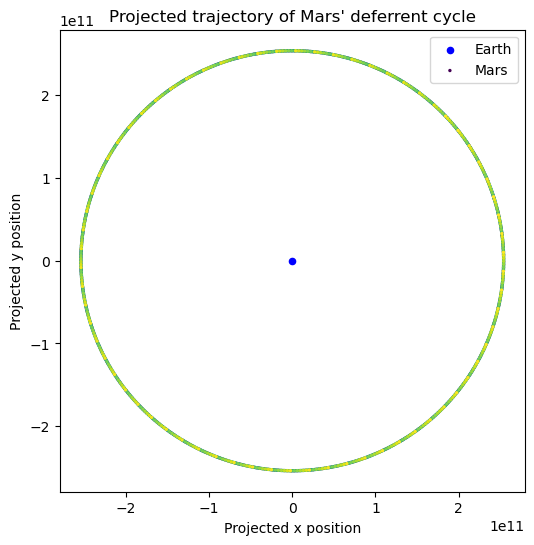

In [70]:
# Plot Mars' modeled trajectory
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(0, 0, s = 20, c = "blue", label = "Earth")
ax.scatter(x_tilde, y_tilde, s = 2, c = t, label = "Mars")
ax.set_title("Projected trajectory of Mars' deferrent cycle")
ax.set_xlabel("Projected x position")
ax.set_ylabel("Projected y position")
ax.legend()

Let's see what the residuals of our predicted angle values look like compared to the true values by recreating the $\Omega t + \theta_0$ component of our calculation.

In [29]:
proj_theta = np.add(np.multiply(omega, t), theta_naught)

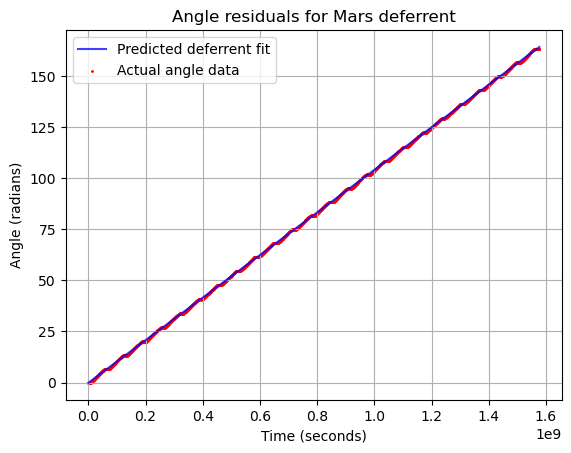

In [49]:
# Plot angle residuals
fig, ax = plt.subplots()
ax.plot(t, proj_theta, color = "blue", alpha = 0.75, label = "Predicted deferrent fit")
ax.scatter(t, theta, s = 1, color = "red", label = "Actual angle data")
ax.set_title("Angle residuals for Mars deferrent")
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Angle (radians)")
ax.legend()
ax.grid()

By using the Euclidean distance formula, we can also calculate our distance residuals.

In [54]:
proj_dist = np.sqrt(np.add(np.power(x_tilde, 2), np.power(y_tilde, 2)))

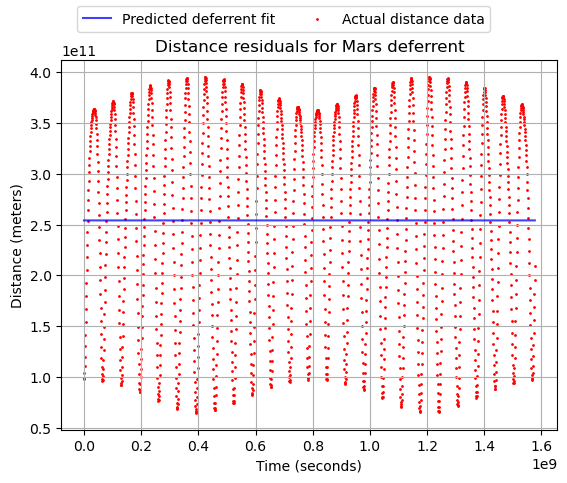

In [60]:
# Plot distance residuals
fig, ax = plt.subplots()
ax.plot(t, proj_dist, color = "blue", alpha = 0.75, label = "Predicted deferrent fit")
ax.scatter(t, r, s = 1, color = "red", label = "Actual distance data")
ax.set_title("Distance residuals for Mars deferrent")
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Distance (meters)")
fig.legend(loc = "upper center", ncol = 2)
ax.grid()

### Epicycle
Now, we're adding an epicycle fit to the model. We're given the following set of equations to describe Mars' position:  
  
$$ \tilde{x} = \overline{r}\cdot[\cos(\Omega t+\theta_0)+a\cos(\omega t+\theta_1)] $$
$$ \tilde{y} = \overline{r}\cdot[\sin(\Omega t+\theta_0)+a\sin(\omega t+\theta_1)] $$  